In [34]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import MCMT

# import basic plot tools
from qiskit.visualization import plot_histogram

In [35]:
#How to implement ZGate with 2 controls and one target.
n=3
c3z= MCMT('cz',n-1,1)
c3z.draw()

q_0: ─■─
      │ 
q_1: ─■─
      │ 
q_2: ─■─

In [36]:
#qc.draw()

In [37]:

qc = QuantumCircuit(3)

#Look for 001
qc.z(0)

#In case you want to look for |111⟩
#qc.compose(c3z,qubits=[0,1,2],inplace=True)

oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"


In [38]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [39]:
#Disregard for the purpose of this example of Questions and Answers
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


In [40]:
n = 3
grover_circuit = QuantumCircuit(n)

#creating state of 1/√3 (|00⟩ |0⟩ + |10⟩ |0⟩ + |11⟩ |0⟩) (asking question)

#How is the weather?
#Do I need to buy bread today?
#How is my friend feeling?

grover_circuit.ry(2 * 0.9553166181, 1)
grover_circuit.ch(1,2)
grover_circuit.x(1)
grover_circuit.x(2)
grover_circuit.barrier(0,1,2)

#creating state of 1/√3(|001⟩+|101⟩+|110⟩) (answering question)

#The weather is rainy.
#You don't need to buy bread today.
#Your friend is Happy.

grover_circuit.cx(0,2)
grover_circuit.x(0)
grover_circuit.cx(1,0)
grover_circuit.barrier(0,1,2)
#grover_circuit.ccx(2,1,0)

#finding answer in the superposition of answers.


#grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])

#2 iterations on the diffuser - - Optimal iterations = (π/4)* N) where N is number of possible inputs)
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

░      ┌───┐┌───┐ ░ ┌─────────────┐┌────────┐»
   q_0: ─────────────────────────░───■──┤ X ├┤ X ├─░─┤0            ├┤0       ├»
        ┌────────────┐     ┌───┐ ░   │  └───┘└─┬─┘ ░ │             ││        │»
   q_1: ┤ Ry(1.9106) ├──■──┤ X ├─░───┼─────────■───░─┤1 U$_\omega$ ├┤1 U$_s$ ├»
        └────────────┘┌─┴─┐├───┤ ░ ┌─┴─┐           ░ │             ││        │»
   q_2: ──────────────┤ H ├┤ X ├─░─┤ X ├───────────░─┤2            ├┤2       ├»
                      └───┘└───┘ ░ └───┘           ░ └─────────────┘└────────┘»
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ┌────────┐ ░ ┌─┐      
«   q_0: ┤0       ├─░─┤M├──────
«        │        │ ░ └╥┘┌─┐   
«   q_1: ┤1 U$_s$ ├─░──╫─┤M├───
«        │        │ ░  ║ └╥┘┌─┐
«   q_2: ┤2       ├─░──╫──╫─┤M├
«        └────────┘ ░  ║  ║ └╥┘
«meas: 3/══════════════╩══╩══╩═
«                      0  1  2

In [ ]:
from qiskit import transpile 
from qiskit import IBMQ
#Add IBM Quantum Platform API Key
IBMQ.save_account('XXXXX')
# Use AerSimulator
from qiskit import Aer



In [42]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers
from qiskit_ibm_runtime import QiskitRuntimeService



ibmqfactory.load_account:WARNING:2024-02-20 09:17:56,980: Credentials are already in use. The existing account in the session will be replaced.


In [43]:
# Initialize the account first.
service = QiskitRuntimeService()

service.backends()



[<IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

In [44]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()



[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [45]:
ActualQuantumComputer = provider.get_backend('ibm_osaka') 
transpiled_circuit= transpile(grover_circuit, ActualQuantumComputer)
transpiled_circuit.draw()


global phase: 5π/4
                                                                        »
    ancilla_0 -> 0 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_1 -> 1 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_2 -> 2 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_3 -> 3 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_4 -> 4 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_5 -> 5 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_6 -> 6 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_7 -> 7 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_8 -> 8 ─────────────────────────────────────────────────────»
                                                                        »
    ancilla_9 -> 9 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_10 -> 10 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_11 -> 11 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_12 -> 12 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_13 -> 13 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_14 -> 14 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_15 -> 15 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_16 -> 16 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_17 -> 17 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_18 -> 18 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_19 -> 19 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_20 -> 20 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_21 -> 21 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_22 -> 22 ─────────────────────────────────────────────────────»
                                                                        »
  ancilla_23 -> 23 ─────────────────────────────────────────────────────»
                   ┌────┐  ┌──────────┐ ┌────┐┌──────┐┌──────────┐┌────┐»
         q_2 -> 24 ┤ √X ├──┤ Rz(-π/4) ├─┤ √X ├┤0     ├┤ Rz(-π/2) ├┤ √X ├»
                   ├────┤┌─┴──────────┴┐└────┘│  Ecr │├─────────┬┘├────┤»
         q_1 -> 25 ┤ √X ├┤ Rz(0.33984) ├──────┤1     ├┤ Rz(π/2) ├─┤ √X ├»
                   └────┘└─────────────┘      └──────┘└─────────┘ └────┘»
  ancilla_24 -> 26 ────────────────────────────────────────

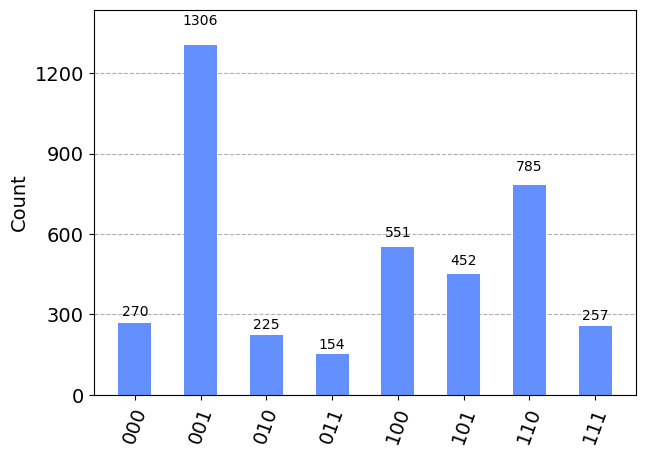

In [46]:
result = ActualQuantumComputer.run(transpiled_circuit).result()
counts = result.get_counts()
plot_histogram(counts)